In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
astropy.__version__

'5.3.4'

In [4]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [5]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [6]:
observer = astroplan.Observer.at_site('lick')

In [7]:
today = Time('2025-11-22 08:00:00', scale='utc')

In [8]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg eve twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg eve twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
print('12 deg morn twilight', twi12deg.iso)

handoff = Time('2025-11-22 1:15:00', scale='utc') #hand-off to us

12 deg eve twilight 2025-11-22 01:52:16.675
15 deg eve twilight 2025-11-22 02:07:54.750
18 deg eve twilight 2025-11-22 02:23:24.520
18 deg morn twilight 2025-11-22 13:22:14.792
15 deg morn twilight 2025-11-22 13:37:45.376
12 deg morn twilight 2025-11-22 13:53:25.613


In [9]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)03:55:21.7','+09:47:18
#HZ4           = astroplan.FixedTarget(coord=SkyCoord('',unit=(u.hourangle, u.degree)),
#                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
LTT6248    = astroplan.FixedTarget(coord=SkyCoord('15:38:59.8', '-28:35:34', unit=(u.hourangle, u.degree)),
                                      name='LTT6248')#V~11.797


Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard

BD64106        =astroplan.FixedTarget(coord=SkyCoord('00:57:36.70',  '+64:51:34.92',unit=(u.hourangle, u.degree)),
                                      name='BD64106')#V~10.23, polarized
HD236633       =astroplan.FixedTarget(coord=SkyCoord('01:09:12.34',  '+60:37:40.92',unit=(u.hourangle, u.degree)),
                                      name='HD236633')#V~9.18, polarized

G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
GD319          =astroplan.FixedTarget(coord=SkyCoord('12:50:05.00',  '+55:06:00.0',unit=(u.hourangle, u.degree)),
                                      name='GD319')#V~12.32, polarized
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)

In [10]:
#stds = [Feige34,BD284211,Feige110,G191B2B,HZ44,BD33d2642] # Kast blue standards

stds = [HD19445,HD84937,BD262606,BD174708,Feige11] # Kast red standards

### Choose Standards for the night

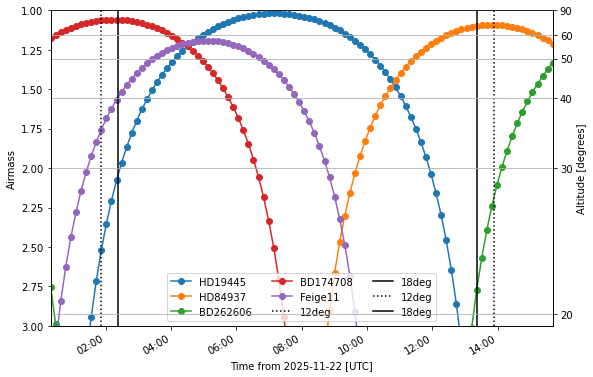

In [11]:
from astropy.utils.iers import conf
conf.auto_max_age = None
# time = today+np.linspace(0, 0.32, 100)
#time = today+np.linspace(-0.1, 0.4, 100)
time = today+np.linspace(-0.32, 0.32, 100)
#plt.figure(figsize=(9,6))
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle,altitude_yaxis=True,ax=ax)

ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')

ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')

#plt.axvline(handoff.plot_date, label='handoff', color='k')
ax.legend(ncol=3, loc='lower center')
plt.grid()


In [12]:
chosen_stds = [BD284211,
               HD84937
               ]

In [13]:
def make_vis(coords,name):
    coords = coords.split()
    ra = coords[0]
    dec = coords[1]
    
    vis = astroplan.FixedTarget(coord=SkyCoord(ra, dec, unit=(u.hourangle, u.degree)),
                                   name=name)
    return vis

In [14]:
sn2024abbv = make_vis('00:34:08.89 -30:46:04.6','2024abbv')
sn2024abfl = make_vis('06:18:01.03 +78:22:01.2','2024abfl')
sn2024abfo = make_vis('03:57:25.61 -46:11:07.6','2024abfo')
sn2024xal = make_vis('03:44:01.35 -14:21:44.4','2024xal')
sn2024wpp = make_vis('02:42:05.48 -16:57:23.1','2024wpp')
sn2024dy = make_vis('10:46:45.02 +29:54:34.0','2024dy')
sn2024gvz = make_vis('06:07:51.73 -24:53:52.7','2024gvz')
sn2024acyl = make_vis('02:46:05.34 +28:01:17.9','2024acyl')
sn2024uwq = make_vis('20:24:36.76 -43:40:09.9','2024uwq')
sn2024abvb = make_vis('01:10:57.53 -05:44:07.9','2024abvb')
sn2024aasm = make_vis('23:07:59.86 -08:44:37.1','2024aasm')
sn2024adzu = make_vis('11:31:06.795 +21:16:50.97','2024adzu')
sn2024abqv = make_vis('06:54:33.77 +50:21:00.8','2024abqv')
sn2024aeee = make_vis('08:14:51.31 +73:34:46.1','2024aeee')
sn2024abup = make_vis('01:49:11.31 -10:25:27.4','2024abup')
sn2024aecx = make_vis('11:05:49.55 -00:02:05.4','2024aecx')
sn2025adj = make_vis('14:59:44.47 +51:27:47.0','2025adj')
sn2025ane = make_vis('09:08:42.72 +44:48:46.8','2025ane')
sn2025afe = make_vis('14:55:13.60 +03:36:42.9','2025afe')
sn2025gj = make_vis('09:44:20.27 -21:16:22.3','2025gj')
sn2024adxu = make_vis('14:41:05.35 -17:28:37.3','2024adxu')
sn2025akv = make_vis('07:43:22.17 -29:12:55.2','2025akv')
sn2025oq = make_vis('06:54:33.77 +50:21:00.8','2025oq')
sn2025baq = make_vis('14:22:17.944 +50:30:29.76','2025baq')
sn2024ggi = make_vis('11:18:22.09 -32:50:15.3','2024ggi')
sn2025bbo = make_vis('01:37:17.27 +45:43:31.8','2025bbo')
sn2025brs = make_vis('06:18:59.11 -24:37:39.0','2025brs')
sn2025mvn = make_vis('13:13:27.88 +36:35:11.7','2025mvn')
sn2025ngs = make_vis('15:35:16.68 +30:51:55.5','2025ngs')
sn2025pht = make_vis('04:41:28.87 -02:51:55.8','2025pht')
sn2025abov = make_vis('03:06:55.620 -11:58:55.75','2025abov')
sn2025tis = make_vis('03:55:22.779 -28:09:32.68','2025tis')
sn2025adtn = make_vis('09:42:03.31 +00:20:28.2','2025adtn')
sn2025rbs = make_vis('22:37:03.66 +34:25:08.0','2025rbs')

In [15]:
targets = [
    sn2025tis,
    sn2025pht,
    sn2025abov,
    sn2025adtn,
    sn2025rbs
]

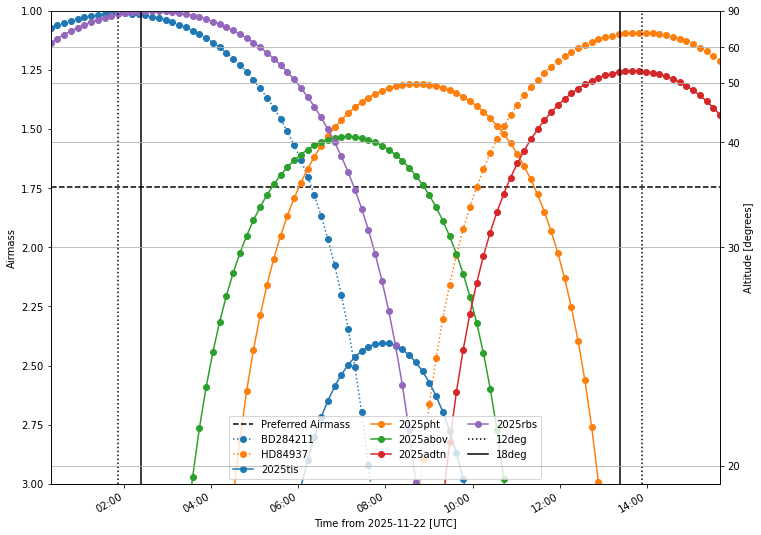

In [16]:
plt.close()
fig = plt.figure(figsize=(12,9))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-35)*u.degree).to(u.radian)), color='k', ls='--', label='Preferred Airmass')
# time = today+np.linspace(-0.05, 0.4, 100)
time = today+np.linspace(-0.32, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
#ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [17]:
blue_std = """
G191B2B     05:05:30.62 +52:49:54.0 11.8 1x240
Feige34     10:39:36.74 +43:06:09.3 11.2 1x180
HZ44        13:23:35.26 +36:07:59.5 11.7 1x240
BD33d2642   15:51:59.86 +32:56:54.8 10.8 1x180
BD284211    21:51:11.02 +28:51:50.4 10.7 1x180
Feige110    23:19:58.00 -05:09:55.8 11.8 1x240
"""

red_std = """
HD19445     03:08:25.86 +26:20:05.7 8.1 1x40
HD84937     09:48:56.09 +13:44:39.3 8.3 1x60 
BD262606    14:49:02.35 +25:42:09.1 9.7  1x135
BD174708    22:11:31.37 +18:05:34.2 9.2  1x135
"""

In [18]:
tab ="""buffer      00:00:00    -90:00:00.  99    0x1200
BD284211    21:51:11.02 +28:51:50.4 10.7 1x180
2025qpk     20:44:37.56 -01:43:12.6 17.9 5x1200
2025rbs     22:37:03.66 +34:25:08.0 16.3 4x1200
2025abov    03:06:55.62 -11:58:55.8 15.2 3x900
2025tis     03:55:22.78 -28:09:32.7 16.2 4x1200
2025pht     04:41:28.87 -02:51:55.8 17.6 5x1200
2025adtn    09:42:03.31 +00:20:28.2 17.7 3x1200
2025addb    09:49:54.16 +00:36:59.6 16.5 4x1200
HD84937     09:48:56.09 +13:44:39.3 8.3 1x60 
end     00:00:00     -90:00:00.  99 1x1"""
#2025baq     14:22:17.94 +50:30:29.7 17.52 6x1200
#2025gvs     15:50:23.39 +25:55:10.0 17.9 5x1200
#2025fvw     15:35:25.76 +12:03:28.3 17.6 6x1200
#2024afyu    17:13:43.05 +07:37:30.9 16.9 4x1200
#
# 2025ngs     15:35:16.68 +30:51:55.5 16.8 4x1200
# 2025qtt     19:31:06.01 +54:06:03.7 17.1 5x1200
# 2025rvv     20:48:10.33 -24:21:34.1 16.3 2x900
# 2025qpk     20:44:37.56 -01:43:12.6 14.7 3x600
# 2025rbs     22:37:03.66 +34:25:08.0 12.4 3x200
# 2025pjx     00:53:25.43 +29:16:41.7 17.1 5x1200
#2025bco     13:15:43.30 -00:28:18.8 17.2 5x1200
#2025pjx     00:53:25.43 +29:16:41.7 16.7 3x1200
#2025sbs     04:30:50.76 -05:47:50.1 17.7 5x1200
#2025siu     00:45:21.74 +29:49:40.8 15.9 3x1200
#2025pht     04:41:28.87 -02:51:55.8 14.2 2x300
#2025ngs     15:35:16.68 +30:51:55.5 16.8 3x1200
#2025gvs     15:50:23.39 +25:55:10.0 17.9 5x1200
#2025mvn     13:13:27.88 +36:35:11.7 16.7 3x1200
#2025pht     04:41:28.87 -02:51:55.8 14.2 2x300

#2025oq      06:54:33.77 +50:21:00.8 18.73 6x1200
# buffer      05:00:00    -50:00:00   xx   6x1200
#2025brs     06:18:59.11 -24:37:39.0 18.10 5x1200
#2025bbo     01:37:17.27 +45:43:31.8 18.00 6x1200
#2024xal     03:44:01.35 -14:21:44.4 17.89 6x1200
#2024abup    01:49:11.31 -10:25:27.4 17.5 5x1200
# 2024aeee    08:14:51.31 +73:34:46.1 16.40 4x1200
# 2025qe      09:18:28.19 +73:45:44.9 16.42 4x1200
# 2025ane     09:08:42.72 +44:48:46.8 18.02 6x1200
# 2024aecx    11:05:49.55 -00:02:05.4 16.50 4x1200
# 2024dy      10:46:45.02 +29:54:34.0 17.9 6x1200
#2024abvb    01:10:57.53 -05:44:07.9 17.5 5x1200
#2024adzu    11:31:06.79 +21:16:50.9 18.73 6x1200

In [19]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [20]:
#night_start = handoff
night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [21]:
tbdata['start'] = obs_start[:-1]

In [22]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
buffer,00:00:00,-90:00:00.,99,0x1200,0.0,1200.0,2025-11-22 02:07:54.750
BD284211,21:51:11.02,+28:51:50.4,10.7,1x180,1.0,180.0,2025-11-22 02:09:39.750
2025qpk,20:44:37.56,-01:43:12.6,17.9,5x1200,5.0,1200.0,2025-11-22 02:17:39.750
2025rbs,22:37:03.66,+34:25:08.0,16.3,4x1200,4.0,1200.0,2025-11-22 04:15:39.750
2025abov,03:06:55.62,-11:58:55.8,15.2,3x900,3.0,900.0,2025-11-22 05:50:24.750
2025tis,03:55:22.78,-28:09:32.7,16.2,4x1200,4.0,1200.0,2025-11-22 06:46:54.750
2025pht,04:41:28.87,-02:51:55.8,17.6,5x1200,5.0,1200.0,2025-11-22 08:21:39.750
2025adtn,09:42:03.31,+00:20:28.2,17.7,3x1200,3.0,1200.0,2025-11-22 10:19:39.750
2025addb,09:49:54.16,+00:36:59.6,16.5,4x1200,4.0,1200.0,2025-11-22 11:31:09.750


In [23]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

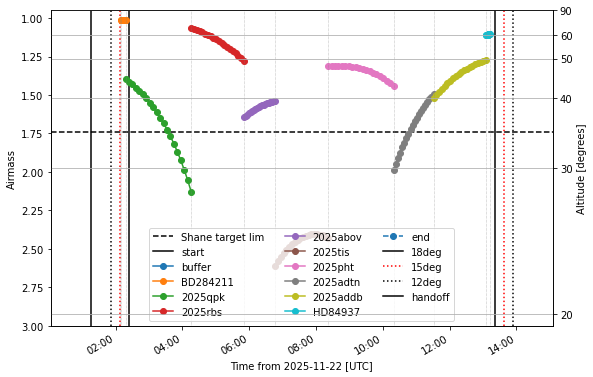

In [24]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-35)*u.degree).to(u.radian)), color='k', ls='--', label='Shane target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [25]:
handoff

<Time object: scale='utc' format='iso' value=2025-11-22 01:15:00.000>

buffer [-1.889407167934337, -1.8878678771486683, -1.8863285863629926, -1.8847892955773204, -1.8832500047917549, -1.8817107140060791, -1.88017142322051, -1.8786321324348307, -1.8770928416490413, -1.875553550863362, -1.8740142600776792, -1.872474969292103, -1.8709356785064202, -1.8693963877208404, -1.867857096935154, -1.8663178061495742, -1.8647785153637777, -1.8632392245781944, -1.8616999337925044, -1.860160643006811]
BD284211 [0.28677824588207557, 0.29381500375934166, 0.3008517616366362, 0.30788851951406215, 0.31492527739140286, 0.3219620352689887, 0.32899879314637914, 0.3360355510239046, 0.34307230890134477, 0.35010906677891995, 0.3571458246563033, 0.36418258253403835, 0.37121934041158156, 0.3782560982892562, 0.38529285616695574, 0.39232961404457, 0.3993663719222127, 0.4064031298000934, 0.41343988767767925, 0.4204766455556097]
2025qpk [1.5297710900000538, 1.63356326870014, 1.7373554474056156, 1.8411476261164559, 1.9449398048325328, 2.0487319835540454, 2.1525241622808586, 2.25631634101

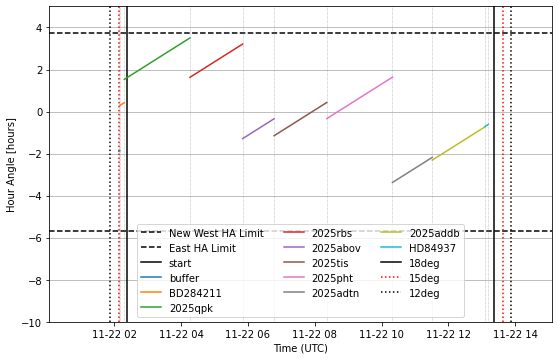

In [26]:
import matplotlib.dates as dates

fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.axhline(3.75, color='k', linestyle='--', label='New West HA Limit')
plt.axhline(-5.67, color='k', linestyle='--', label='East HA Limit')
# time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')

location = EarthLocation(lat=37.3414*u.deg, lon=-121.6429*u.deg, height=1283*u.m)

for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    if irow['name']=='end':
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
        
    lst = time.sidereal_time('apparent', longitude=location.lon)
    ha = (lst - itarget.ra)
    
    ha_mod = []
    for i in ha.hour:
        if i > 20:
            ha_mod.append(i-24)
        elif i < -20:
            ha_mod.append(i+24)
        else:
            ha_mod.append(i)
#     print(irow['name'],ha_mod)       
    plt.plot(time.datetime,ha_mod,label=irow['name'])

ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(-10,5)
plt.grid(axis='y')
plt.xlabel('Time (UTC)')
plt.ylabel('Hour Angle [hours]')
plt.savefig('schedule_ha.pdf')

###### Backup

In [27]:
tab = """buffer      00:00:00    -90:00:00.  99    15x1200 
2025aarn    04:37:19.58 -08:46:35.9 17.4 5x1200
end     00:00:00     -90:00:00.  99 1x1 """

#2025qzw     21:06:38.49 +24:54:15.1 17.5 2x1200
#2025qe      09:18:28.19 +73:45:44.9 16.42 4x1200
#2025sfc     00:02:06.12 +49:26:06.6 18.64 6x1200
#2025sii     17:47:54.80 +06:57:29.0 15.49 3x600
# 2024abbv    00:34:08.89 -30:46:04.6 14.8 3x900
# 2024vfo     01:07:27.38 +39:24:12.9 18.8 6x1200
# 2024wal     02:42:59.46 +11:57:28.3 18.5 6x1200
# buffer      00:00:00    -90:00:00.  99   5x1200 
# 2024iss     12:59:06.14 +28:48:42.5 17.5 4x1200

In [28]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [29]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [30]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
buffer,00:00:00,-90:00:00.,99,15x1200,15.0,1200.0
2025aarn,04:37:19.58,-08:46:35.9,17.4,5x1200,5.0,1200.0
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0


In [31]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [32]:
tbdata['start'] = obs_start[:-1]

In [33]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
buffer,00:00:00,-90:00:00.,99,15x1200,15.0,1200.0,2025-11-22 01:15:00.000
2025aarn,04:37:19.58,-08:46:35.9,17.4,5x1200,5.0,1200.0,2025-11-22 07:05:30.000
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2025-11-22 09:03:30.000


In [34]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

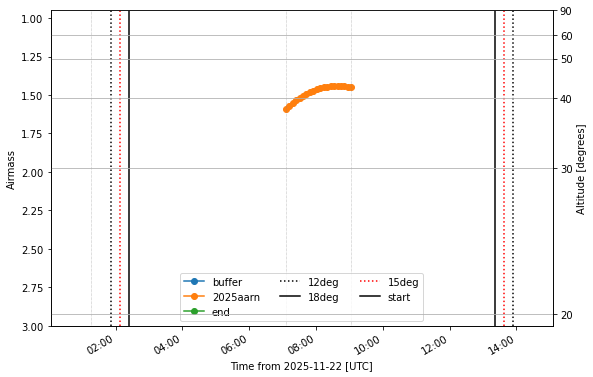

In [35]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
# ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')